# Excercise 1 Task 1
## Tutorial 1 - Classification of the iris flowers dataset on the Jupyter Notebook using Python

In [1]:
# Load neccessary libraries changed pandas import for convinience
import pandas as pd
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
#from sklearn import cross_validation
# from sklearn import cross_validation
# !! Divergence to tutorial as the module cross_validation is deprecated
# Use of train_test_split instead
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [3]:
print(dataset.shape)

(150, 5)


In [3]:
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

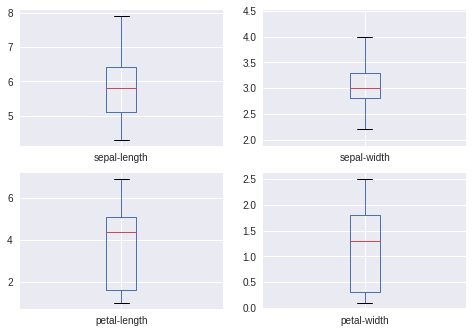

In [4]:
# box and whisker plot for each attribute
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

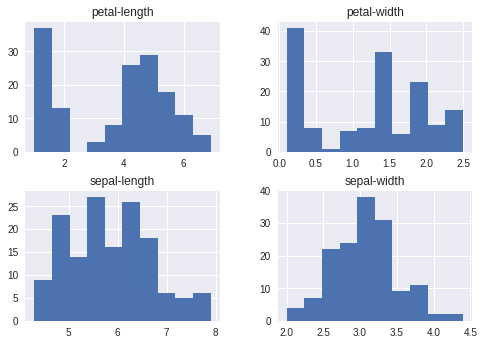

In [5]:
dataset.hist()
plt.show()

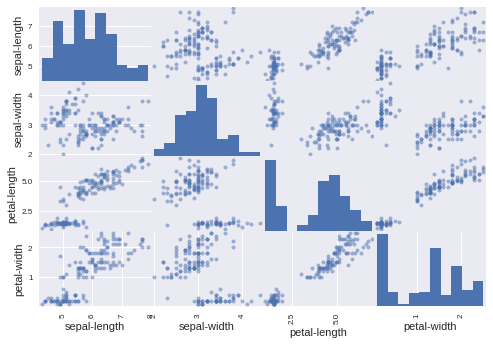

In [6]:
scatter_matrix(dataset)
plt.show()

In [18]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,-1]
validation_size = 0.20
seed = 7
# Usage of new sklearn method train_test_split instead of cross validation
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [19]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [31]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#Evaluate each model in turn
results = []
names = []
for name, model in models:
    model.fit(X_train, Y_train)
    cv_results = cross_val_score(model, X_train, Y_train, cv=10)
    #cv_results = model.score(X_validation, Y_validation, cv=10)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.967308 (0.040078)
LDA: 0.974883 (0.038494)
KNN: 0.981667 (0.036856)
CART: 0.974883 (0.038494)
NB: 0.966550 (0.041087)
SVM: 0.991667 (0.025000)


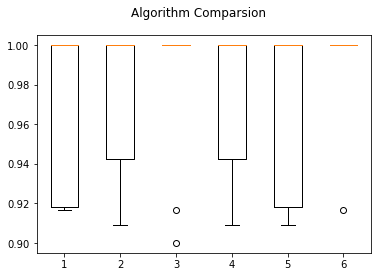

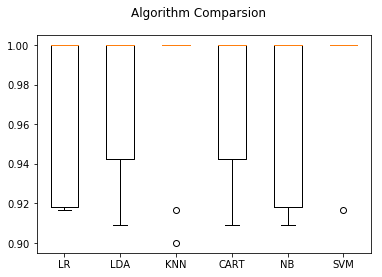

In [33]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparsion')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [34]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

In [63]:
print("Accuracy: %.2f" % accuracy_score(Y_validation, predictions))
indexes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
#accuracy_score(Y_validation,predictions)[0:,:]
df = pd.DataFrame(
    data = confusion_matrix(Y_validation, predictions),
    index = indexes,
    columns = indexes
)

print(df)
print(classification_report(Y_validation, predictions))

Accuracy: 0.90
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa                7                0               0
Iris-versicolor            0               11               1
Iris-virginica             0                2               9
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30

